In [2]:
import csv
import re
import pandas as pd
from itertools import permutations
import matplotlib.pyplot as plt
from pathlib import Path

In [9]:
def binary2string(input_string):
    output_string = ''
    for char in input_string:
        if char == '0':
            output_string += 'B'
        elif char == '1':
            output_string += 'G'
        elif char == '2':
            output_string += 'R'
    return output_string

def read_file(directory, round, operations,capacity):
    data = []
    filename = directory + str(round) + "_" + str(operations) + "_C" + str(capacity) + ".dat_res.txt"
    data.append(capacity)

    try:
      with open(filename, 'r') as file:
          lines = file.readlines()
    except FileNotFoundError:
      return None

    sequence = []
    for line_number, line in enumerate(lines[:-1], start=1):
        if line_number <= 8:
            parts = line.strip().split('=')
            data.append(float(parts[1].strip()))
        else:
            match = re.search(r'location = (\d+)', line)
            sequence.append(int(match.group(1)))

    data.append(sequence)
    return data

def make_table(rounds, capacity, operations, directory, file_name):
    index = []
    file_path = directory + file_name
    table_data = []

    for r , name in enumerate(rounds):
        for i, code in enumerate(operations):
            for c in range (1 , capacity +1) :
                data = read_file(directory, name, code, c)
                if data is not None:
                    index.append(binary2string(code))
                    table_data.append(pd.Series(data))


    dt = pd.DataFrame(table_data, index = index)
    dt = dt.rename(columns={
        0: 'Capacity',
        1: 'TimeToSolve',
        2: 'Objective',
        3: 'Iterations',
        4: 'Constraints',
        5: 'Variables',
        6: 'Movements',
        7: 'Gap',
        8: 'LowerBound',
        9: 'Sequence'
    })

    dt.to_csv(file_path)
    return dt

# Mixed Integer Programming

In [5]:
# Round1
round = ['R1M1', 'R1M2', 'R1M3']
operations = ['0'.zfill(4)]
max_capacity = 4
directory = '../results/Data1/'
file = "R1.csv"
R1 = make_table(round, max_capacity, operations, directory, file)

In [10]:
# Round2
digits = '1100'
operations = set()
for p in permutations(digits):
    operations.add(''.join(p))

round = ['R2']
max_capacity = 4
directory = '../results/Data2/'
file = "R2.csv"
R2 = make_table(round, max_capacity, operations, directory, file)

In [13]:
# Round 2 extra cases
round = ['R2E']
operations = ['1110', '1111']
max_capacity = 2
directory = '../results/Data2E/'
file = "R2E.csv"
R2E = make_table(round, max_capacity, operations, directory, file)

In [14]:
# Round 2 with model 3
digits = '1100'
operations = set()
for p in permutations(digits):
    operations.add(''.join(p))

round = ['R2M3']
max_capacity = 4
directory = '../results/Data2M3/'
file = "R2M3.csv"
R2M3 = make_table(round, max_capacity, operations, directory, file)

In [15]:
# Round 3
digits = '2110'
operations = set()
for p in permutations(digits):
    operations.add(''.join(p))

round = ['R3']
max_capacity = 4
directory = '../results/Data3/'
file = "R3.csv"
R3 = make_table(round, max_capacity, operations, directory, file)

In [16]:
# Round 3 extra cases
round = ['R3E']
operations = ['2200', '2210', '2211', '2220', '2221', '2222']
max_capacity = 1
directory = '../results/Data3E/'
file = "R3E.csv"
R3E = make_table(round, max_capacity, operations, directory, file)

# Statistics

In [17]:
meanM2 = R2['TimeToSolve'].mean()
meanM3 =R2M3['TimeToSolve'].mean()

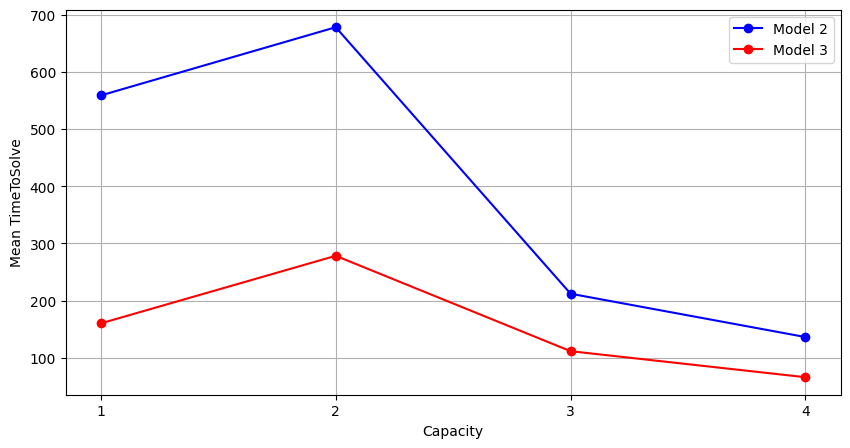

In [22]:
mean_values_R2 = R2.groupby('Capacity')['TimeToSolve'].mean()
mean_values_R2M3 = R2M3.groupby('Capacity')['TimeToSolve'].mean()

plt.figure(figsize=(10, 5))
plt.plot(mean_values_R2.index, mean_values_R2, label='Model 2', color='blue', marker='o')
plt.plot(mean_values_R2M3.index, mean_values_R2M3, label='Model 3', color='red', marker='o')
plt.xlabel('Capacity')
plt.ylabel('Mean TimeToSolve')
plt.legend()
plt.grid(True)
plt.xticks(range(int(min(mean_values_R2.index)), int(max(mean_values_R2.index)) + 1))
plt.show()

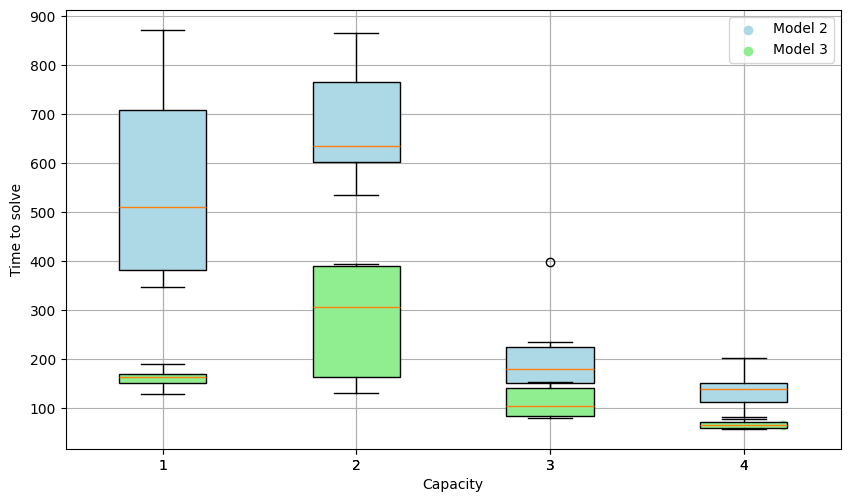

In [23]:
mean_values_R2 = R2.groupby('Capacity')['TimeToSolve'].mean()
mean_values_R2M3 = R2M3.groupby('Capacity')['TimeToSolve'].mean()

plt.figure(figsize=(10, 5.7))
plt.boxplot([group['TimeToSolve'] for _, group in R2.groupby('Capacity')], positions=mean_values_R2.index , patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.scatter(mean_values_R2.index - 0.2, mean_values_R2, color='lightblue', label='Model 2')

plt.boxplot([group['TimeToSolve'] for _, group in R2M3.groupby('Capacity')], positions=mean_values_R2M3.index , patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.scatter(mean_values_R2M3.index + 0.2, mean_values_R2M3, color='lightgreen', label='Model 3')

plt.xlabel('Capacity')
plt.ylabel('Time to solve')
plt.legend()
plt.grid(True)
plt.show()

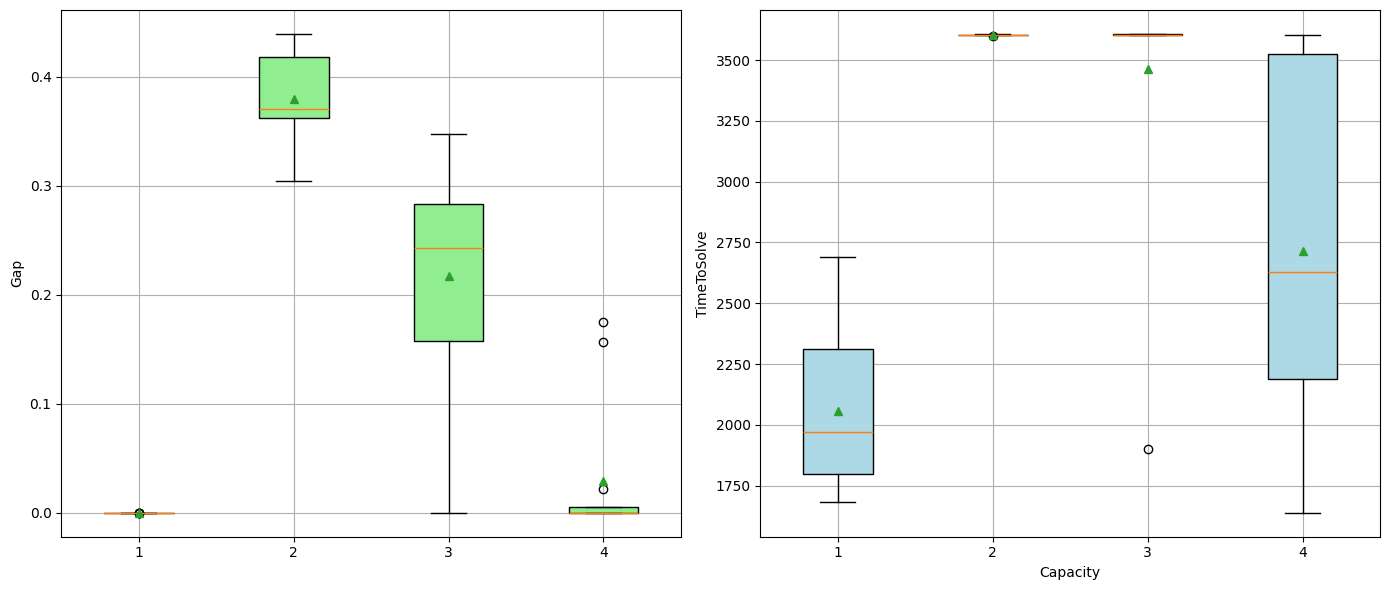

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

mean_values = R3.groupby('Capacity')[['Gap', 'TimeToSolve']].mean()
std_values = R3.groupby('Capacity')[['Gap', 'TimeToSolve']].std()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.boxplot([group['Gap'] for _, group in R3.groupby('Capacity')], positions=mean_values.index, patch_artist=True, boxprops=dict(facecolor='lightgreen'),showmeans=True)
plt.ylabel('Gap')
plt.grid()

plt.subplot(1, 2, 2)
plt.boxplot([group['TimeToSolve'] for _, group in R3.groupby('Capacity')], positions=mean_values.index, patch_artist=True, boxprops=dict(facecolor='lightblue'),showmeans=True)
plt.xlabel('Capacity')
plt.ylabel('TimeToSolve')
plt.grid()

plt.tight_layout()
plt.show()

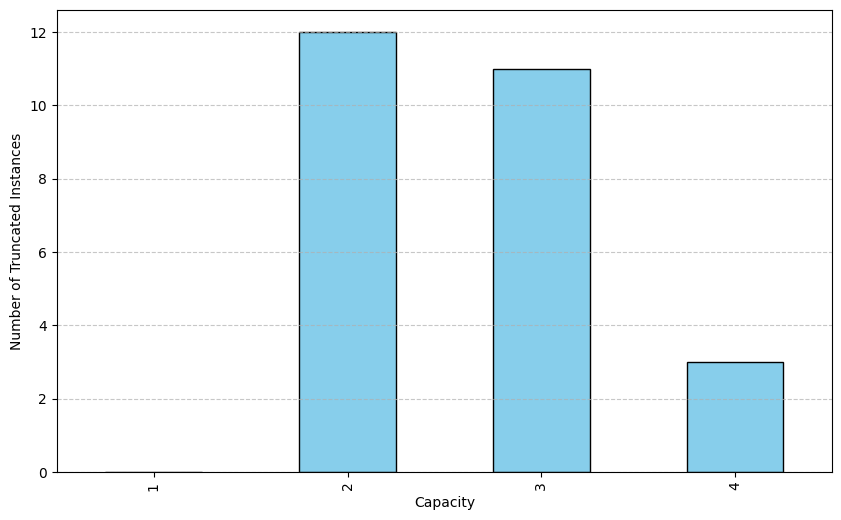

In [25]:
total_cases = R3.groupby('Capacity').size()

unfinished_cases = R3[R3['Gap'].round(2) > 0]

unfinished_counts = unfinished_cases.groupby('Capacity').size()

unfinished_counts = unfinished_counts.reindex(total_cases.index, fill_value=0)

plt.figure(figsize=(10, 6))
unfinished_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Capacity')
plt.ylabel('Number of Truncated Instances')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Integer Programming

In [ ]:
# Grid search
for i in range(2,4):
  directory_path = Path('C='+str(i))

  data_dict = {}
  for file_path in directory_path.iterdir():
      if file_path.is_file():
        filename_wo_ext = file_path.name.rsplit('.', 1)[0]
        parts = filename_wo_ext.split('_')

        method_name = parts[0]
        operation_1 = parts[1]
        operation_2 = parts[2]

        operation_1_cleaned = operation_1.replace('f.', '')
        operation_2_cleaned = operation_2.replace('f.', '')

        try:
          with open(file_path, 'r') as file:
              lines = file.readlines()
        except FileNotFoundError:
            pass

        for line_number, line in enumerate(lines[:-1], start=1):
          if line_number == 1:
              parts = line.strip().split('=')
              data =(float(parts[1].strip()))
              key = (operation_1_cleaned, operation_2_cleaned,method_name)
              data_dict[key] = data
  df = pd.DataFrame(list(data_dict.items()), columns=['Operations', 'Value'])

  df[['Operation_1', 'Operation_2', 'Method']] = pd.DataFrame(df['Operations'].tolist(), index=df.index)
  df.drop(columns=['Operations'], inplace=True)

  df_sorted = df.sort_values(by='Value')
  print(df_sorted[0:10])
  df_sorted[0:10].to_csv("C="+str(i)+"_TOP10.csv")
  df_sorted.to_csv("C="+str(i)+"_All_ordered.csv")
  methods = df_sorted['Method'].unique()

  dfs = {}
  for method in methods:
      df_method = df_sorted[df_sorted['Method'] == method].pivot(index='Operation_1', columns='Operation_2', values='Value')
      dfs[method] = df_method

  for method, df_method in dfs.items():
      df_method.to_csv(method+"_C="+str(i)+".csv")